<a href="https://colab.research.google.com/github/Aafaaq77/machineLearningCoursera/blob/main/course1/linRegressionWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Loading the House sales data

In [2]:
sales = pd.read_csv('home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


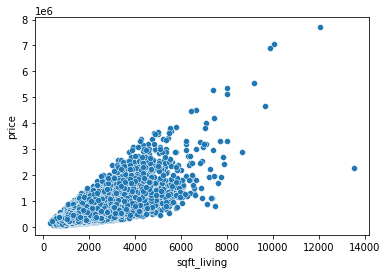

In [3]:
# sns.pairplot(data=sales)
sns.scatterplot(x='sqft_living', y='price', data=sales)

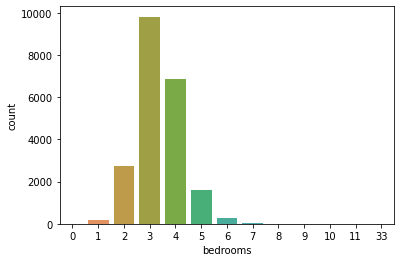

In [4]:
sns.countplot(x='bedrooms', data=sales)

In [5]:
sales.groupby('zipcode').mean()['price']

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

In [6]:
sales.shape

(21613, 21)

In [7]:
%%timeit
sales.query('sqft_living >= 2000 and sqft_living <= 4000')

100 loops, best of 5: 5.91 ms per loop


In [8]:
%%timeit
sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)]

100 loops, best of 5: 2.84 ms per loop


In [9]:
smaller = sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)]

In [10]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
print(advanced_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### Simple regression model that predicts price from square feet

In [11]:
# 
X = sales['sqft_living']
y = sales['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
sqft_model = LinearRegression()
sqft_model.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_predicted = sqft_model.predict(np.array(X_test).reshape(-1,1))

In [14]:
sqft_model.coef_

array([283.96855737])

In [15]:
mean_squared_error(y_true=y_test, y_pred=y_predicted)

61940787221.49824

In [16]:
r2_score(y_true=y_test, y_pred=y_predicted)

0.47915770799654944

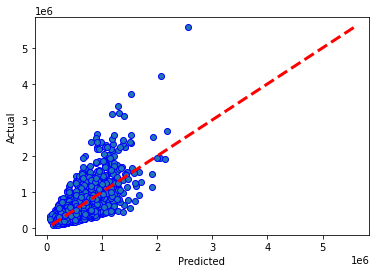

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Building a model wit more features

In [19]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [20]:
X = sales[my_features]
y = sales['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
my_features_model = LinearRegression()

In [24]:
my_features_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### And a model with even more Features

In [25]:
advanced_features_model = LinearRegression()
X_advanced = sales[advanced_features]
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(X_advanced, y, test_size=0.2, random_state=0)
advanced_features_model.fit(X_train_advanced, y_train_advanced)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
my_features_predicted = my_features_model.predict(X_test)
advanced_features_predicted = advanced_features_model.predict(X_test_advanced)

In [27]:
print(f'Mean squared error of a simple sqft_model: {61940787221.49824}')
print(f'Mean squared error of a model with more features: {mean_squared_error(y_test, my_features_predicted)}')
print(f'Mean squared error of a_model with advanced features: {mean_squared_error(y_test_advanced, advanced_features_predicted)}')

Mean squared error of a simple sqft_model: 61940787221.49824
Mean squared error of a model with more features: 59538329945.14358
Mean squared error of a_model with advanced features: 36280106854.24025


In [29]:
# normalized for better understanding
print(f'Mean squared error of a simple sqft_model: {61940787221.49824**0.5}')
print(f'Mean squared error of a model with more features: {mean_squared_error(y_test, my_features_predicted)**0.5}')
print(f'Mean squared error of a_model with advanced features: {mean_squared_error(y_test_advanced, advanced_features_predicted)**0.5}')

Mean squared error of a simple sqft_model: 248879.06143647005
Mean squared error of a model with more features: 244004.77443104176
Mean squared error of a_model with advanced features: 190473.37570967825


Applying learned models to make predictins for some houses

In [47]:
house1 = sales[sales['id']=='5309101200']
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [32]:
sales.shape

(21613, 21)

In [33]:
sales.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [52]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [48]:
house1['sqft_living']

1054    2400
Name: sqft_living, dtype: int64

In [51]:
print('predicted by sqft_model: ', sqft_model.predict(np.array(house1['sqft_living']).reshape(-1, 1)))
print('predicted by my_features_model: ', my_features_model.predict(house1[my_features]))
print('predicted by advanced features model: ', advanced_features_model.predict(house1[advanced_features]))

predicted by sqft_model:  [633267.47422744]
predicted by my_features_model:  [637556.26515923]
predicted by advanced features model:  [674400.87673413]


In [53]:
house2 = sales[sales['id']=='1925069082']
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [54]:
print('predicted by sqft_model: ', sqft_model.predict(np.array(house2['sqft_living']).reshape(-1, 1)))
print('predicted by my_features_model: ', my_features_model.predict(house2[my_features]))
print('predicted by advanced features model: ', advanced_features_model.predict(house2[advanced_features]))

predicted by sqft_model:  [1269357.04273158]
predicted by my_features_model:  [1274443.76531345]
predicted by advanced features model:  [1984534.45106196]


Predicting a fancy house

In [55]:
bill_gates_house = pd.DataFrame({'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]})
bill_gates_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,8,25,50000,225000,4,98039,10,10,1,4,37500,12500,1994,2010,47.627606,-122.242054,5000,40000


In [56]:
print('predicted by sqft_model: ', sqft_model.predict(np.array(bill_gates_house['sqft_living']).reshape(-1, 1)))
print('predicted by my_features_model: ', my_features_model.predict(bill_gates_house[my_features]))
print('predicted by advanced features model: ', advanced_features_model.predict(bill_gates_house[advanced_features]))

predicted by sqft_model:  [14150170.80494039]
predicted by my_features_model:  [15796988.23574092]
predicted by advanced features model:  [11119919.14376884]
